<a href="https://colab.research.google.com/github/07Safwa03/MachineLearningTasks/blob/main/01exercise/kuis_safwa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def load_data():
    data = pd.read_excel('/content/women_s_E-Commerce_clothing_reviews.xlsx')
    return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df.head()

,Unnamed: 0,Clothing.ID,Age,Title,ReviewText,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,ClassName
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
df = pd.DataFrame(tweet_df[['ReviewText','Rating']])

In [ ]:
df.head()

,ReviewText,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [ ]:
df['Rating'].value_counts()

Rating
5    13131
4     5077
3     2871
2     1565
1      842
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
Rating_cnt = Counter(df.Rating)

Text(0.5, 1.0, 'Dataset labels distribuition')

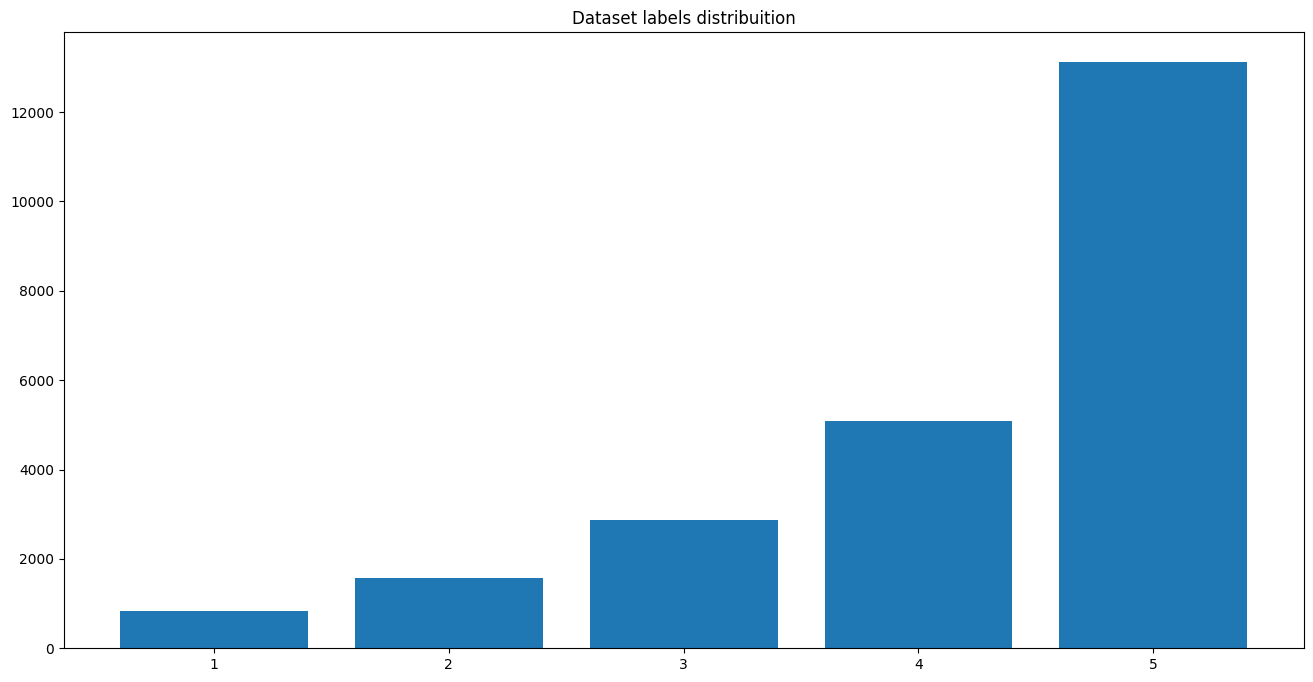

In [ ]:
plt.figure(figsize=(16,8))
plt.bar(Rating_cnt.keys(), Rating_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
#Mengubah text menjadi lowercase
df['lower'] = df['ReviewText'].str.lower()

In [ ]:
df.head()

,ReviewText,Rating,lower
0,Absolutely wonderful - silky and sexy and comf...,4,absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...,5,love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...,3,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,"i love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...,5,this shirt is very flattering to all due to th...


In [ ]:
pip install Sastrawi

In [ ]:
#import stopword
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#tokenize
from nltk.tokenize import TweetTokenizer

In [ ]:
# all
emoticons_phone = set(['🤣','😁','😂','🖖','😘','❤️','😄','😔','☺️','👍','😊','😍','😭','💋','😒','😳','😜','🙈','😡',
                       '😱','😝','😢','😃','😉','😏','😞','😅','😚','🙊','😌','😀','😋','😆','😕','👌','😀','😃',
                       '😄','😁','😆','😅','😂','🤣','☺️','😊','😇','🙂','🙃','😉','😌','😍','🥰','😘','😗','😙','😚',
                       '😋','😛','😝','😜','🤪','🤨','🧐','🤓','😎','🤩','🥳','😏','😒','😞','😔','😟','😕','🙁',
                       '☹️','😣','😖','😫','😩','🥺','😢','😭','😤','😠','😡','🤬','🤯','😳','🥵','🥶','😱','😨',
                       '😰','😥','😓','🤗','🤔','🤭🤫','🤥😶','😐','😑','😬','🙄','😯','😦','😧','😮','😲','🥱','😴',
                       '🤤','😪','😵','🤐','🥴','🤢','🤮','🤧','😷','🤒','🤕','🤑','🤠😈','👿','👹','👺','🤡','💩',
                       '👻','💀','☠️','👽','👾','🤖','🎃','😺','😸','😻','😹','😼','😽','🙀','😿','😾','🤲','👍','🤝',
                       '👎','🤜','🤛','🤞','✌️','🤟','🤘','👌','🤏','👈','👉','👆','👇','☝️','✋','🤚','🖐','🖖','👋','🤙',
                       '💪','🦾','👇','🖕','🙏','🦶','🦵','🦿','💄','💋','👄','🦷','👅','👃','🦻','👣','👁','👀','🧠',
                       '🗣👤','👥','👶','👧','🧒','👦','👩','🧑','👨','👩‍🦱','🧑‍🦱','👨‍🦱👩‍🦰','🧑‍🦰👨‍🦰','👱‍♀️','👱','👱‍♂️','👩‍🦳','🧑‍🦳',
                       '👨‍🦳','👩‍🦲','🧑‍🦲','👨‍🦲','🧔','👵','🧓','👴','👲','👳‍♀️','👳','👳‍♂️','🧕','👮‍♀️','👲','👮‍♂️','👷‍♀️','👷','👷‍♂️',
                       '💂‍♀️','💂','💂‍♂️','🕵️‍♀️','🕵️','🕵️‍♂️','👩‍⚕️','🧑‍⚕️','👨‍⚕️','👩‍🌾','🐒','🙊','🐵','🙈','🙉','🐷','🐻','🐶','🐱',
                       '🦊','🚗','🚕','🚙','🚌','🚎','🏎','🚛','🚚','🚐','🚒','🚑','🚓','🏢','🏠','🏡','🏬','🏘','🏣',
                       '🏚','🏤','🏗','🏥','⛺️','🏦','🏛','💒','🏩','🏫','🏪','🏨','⛪️','🕌','🕍','🛕','🕋','⛩','📈',
                       '📉','🗒','🗓'])

In [ ]:
# sad happy
emoticons_sad_happy= set(['◉‿◉','o ^ - ^ o','^_^',':)',':^)',
                     ': NS)','8)',':HAI','@',':HAI)',':‑)',
                     ':P',':@','8‑D',':‑)',':-&','=D',':‑p',
                     '=‑D','XD',':D',':-))','%-)',':}',
                     ':c)',':^)',':C','>:3',':>','L',':-/','>:/',
                     ':S','>:[','@',':-(','"["',':-<',
                     '=\\','=/','>:(',':',':{','>:\\',
                     '(',':','(", ")',':','("',':-c',
                     '> :(',':‑',':NS('])

In [ ]:
# all emot happy + sad
emoticons = emoticons_phone.union(emoticons_sad_happy)

In [ ]:
def fulltext(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    #remove coma
    tweet = re.sub(r',','',tweet)
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False,
    strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
            word not in emoticons and # remove emoticons
            word not in string.punctuation): # remove punctuation
    #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
    return tweets_clean

In [ ]:
def fulltext(text):
    # Contoh sederhana fungsi fulltext yang mengembalikan string
    return str(text).upper()  # Mengembalikan teks yang diubah menjadi huruf besar

In [ ]:
# Kemudian, Anda bisa mengaplikasikan perubahan ini ke DataFrame
df['token'] = df['ReviewText'].apply(lambda x: fulltext(x))

In [ ]:
df['token'] = df['ReviewText'].apply(lambda x: fulltext(x))

In [ ]:
df.head()

,ReviewText,Rating,lower
0,Absolutely wonderful - silky and sexy and comf...,4,absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...,5,love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...,3,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,"i love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...,5,this shirt is very flattering to all due to th...


In [ ]:
#remove punct
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

In [ ]:
#simpan di kolom tabel baru tweet
df['fulltext'] = df['token'].apply(lambda x: remove_punct(x))

In [ ]:
df.head()

,ReviewText,Rating,lower
0,Absolutely wonderful - silky and sexy and comf...,4,absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...,5,love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...,3,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,"i love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...,5,this shirt is very flattering to all due to th...


In [ ]:
#Mengurutkan ascending urutkan kolom tweet
df.sort_values("fulltext", inplace = True)

In [ ]:
df.head()

,ReviewText,Rating,lower
0,Absolutely wonderful - silky and sexy and comf...,4,absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...,5,love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...,3,i had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl...",5,"i love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...,5,this shirt is very flattering to all due to th...


In [ ]:
#Mengurutkan ascending urutkan kolom tweet
df.sort_values("ReviewText", inplace = True)

In [ ]:
df.head()

,ReviewText
1,Another review
0,This is a good product


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df['ReviewText'])
bow_transformer.vocabulary_

{'another': 0, 'review': 4, 'this': 5, 'is': 2, 'good': 1, 'product': 3}

In [ ]:
tokens = bow_transformer.get_feature_names_out()
print(tokens)

['another' 'good' 'is' 'product' 'review' 'this']


In [ ]:
text_bow = bow_transformer.transform(df['ReviewText'])
print(text_bow)

  (0, 0)	1
  (0, 4)	1
  (1, 1)	1
  (1, 2)	1
  (1, 3)	1
  (1, 5)	1


In [ ]:
X = text_bow.toarray()
print(X)
X.shape

[[1 0 0 0 1 0]
 [0 1 1 1 0 1]]


(2, 6)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(text_bow)
print(tfidf_transformer)

tweet_tfidf=tfidf_transformer.transform(text_bow)
print(tweet_tfidf)
print(tweet_tfidf.shape)

TfidfTransformer()
  (0, 4)	0.7071067811865476
  (0, 0)	0.7071067811865476
  (1, 5)	0.5
  (1, 3)	0.5
  (1, 2)	0.5
  (1, 1)	0.5
(2, 6)
